In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import shapely

In [8]:
def load_data(year):
    os.getcwd()
    df = pd.DataFrame()
    path = "../Data/filled/" + str(year) + "/"
    for filename in os.listdir(path):
        df1 = pd.read_csv(path + filename)
        if df1.geometry.isna().any():
            print(filename)
        df = pd.concat([df, df1])
    df = gpd.GeoDataFrame(df)
    df.geometry = df.geometry.apply(shapely.wkt.loads)
    
    df = df.reset_index()
    df = df.drop(["Unnamed: 0", "index"], axis = 1)
    return df

In [9]:
df15 = load_data(2015)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df15[df15.columns[:-4]]
Y = df15.y
X = scaler.fit_transform(X)

In [63]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 4, min_samples = 10000).fit(X)

In [64]:
(db.labels_ == -1).sum()

28895

In [65]:
df15.shape

(56367, 43)

In [66]:
np.unique(db.labels_)

array([-1,  0], dtype=int64)

In [67]:
len(db.core_sample_indices_)

416

In [68]:
db.components_.shape

(416, 39)

In [55]:
een, twee, drie, vier, nul, mineen = 0,0,0,0,0,0
for i in db.labels_:
    if i == 0: nul+=1
    elif i==1: een+=1
    elif i==2: twee+=1
    elif i==3: drie +=1
    elif i==4: vier+=1
    elif i==-1: mineen +=1

In [56]:
print(nul,een,twee,drie,vier,mineen)

56089 19 20 22 39 178


In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

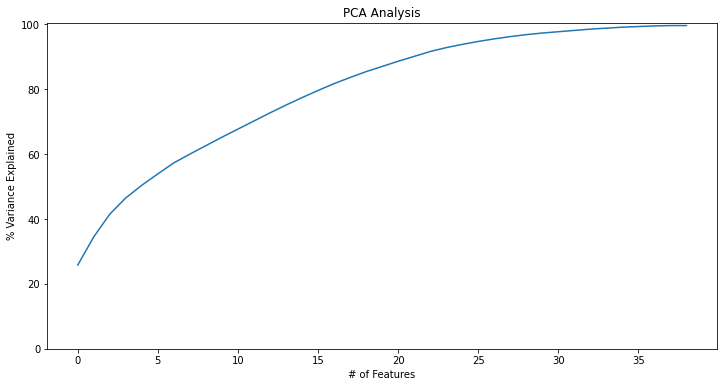

In [73]:
pca = PCA(n_components=39)
pca.fit(X)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [74]:
pca = PCA(n_components=15)
pca.fit(X)
pca_scale = pca.transform(X)

In [77]:
pca_scale.shape
from sklearn.neighbors import NearestNeighbors


AttributeError: module 'matplotlib.pyplot' has no attribute 'show_grid'

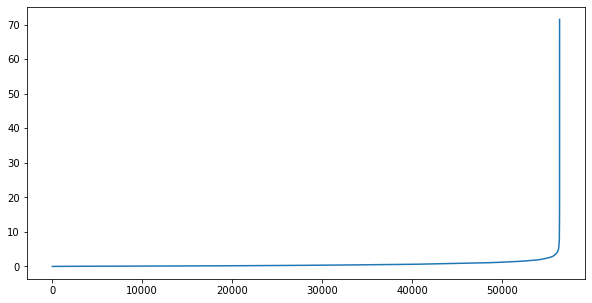

In [80]:

nn = NearestNeighbors(n_neighbors=5).fit(pca_scale)
distances, idx = nn.kneighbors(pca_scale)
distances = np.sort(distances, axis=0)
distances = distances[:,1]


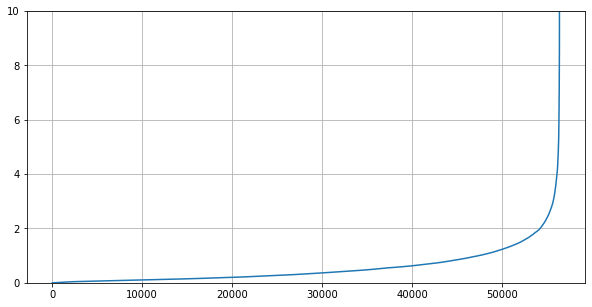

In [83]:
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.ylim(0,10)
plt.grid()
plt.show()

In [86]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 4, min_samples = 30).fit(X)

In [87]:
from collections import Counter

In [89]:
print((db.labels_ == -1).sum())
print(np.unique(db.labels_))
print(Counter(db.labels_))

3380
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Counter({0: 51543, -1: 3380, 2: 559, 19: 100, 9: 84, 4: 82, 11: 74, 13: 60, 3: 50, 6: 42, 7: 41, 16: 41, 14: 40, 15: 39, 8: 37, 1: 35, 12: 35, 5: 32, 10: 32, 18: 31, 17: 30})


In [91]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=4,
         assign_labels='discretize',
         random_state=0, n_jobs = 4).fit(X)

MemoryError: Unable to allocate 23.7 GiB for an array with shape (56367, 56367) and data type float64

In [ ]:
print((clustering.labels_ == -1).sum())
print(np.unique(clustering.labels_))
print(Counter(clustering.labels_))